In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
d1 = pd.read_csv('budgetdata_pre2016.csv',usecols=[0,1,2,3,4],thousands=',')
d2 = pd.read_csv('budgetdata_2016.csv',usecols=[0,1,2,3,4],thousands=',')
df = pd.concat([d1,d2])

In [96]:
df['date']=pd.to_datetime(df['date'])
df=df.set_index('date')

In [97]:
df.head()

,notes,amount,category,person
date,,,,
2014-08-24,groceries,5.00,4.0,c
2014-08-24,groceries,42.00,4.0,c
2014-09-12,groceries,5.66,4.0,c
2014-09-02,groceries,8.00,4.0,c
2014-09-26,groceries,41.78,4.0,c


In [36]:
# gr_by_mn = df.groupby([pd.TimeGrouper('M'),'category','person']).sum().reset_index()
gr_by_mn = df.groupby([pd.TimeGrouper('M'),'category']).sum().reset_index()

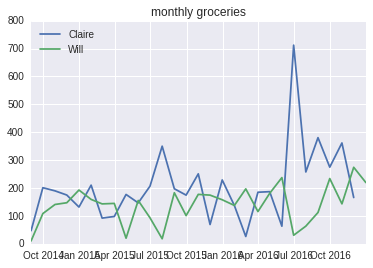

In [31]:
subind = (gr_by_mn['person']=='c') & (gr_by_mn['category']==4)
plt.plot(gr_by_mn.loc[subind,'date'],gr_by_mn.loc[subind,'amount'],label="Claire")
subind = (gr_by_mn['person']=='w') & (gr_by_mn['category']==4)
plt.plot(gr_by_mn.loc[subind,'date'],gr_by_mn.loc[subind,'amount'],label="Will")
plt.title('monthly groceries')
plt.legend(loc=2)

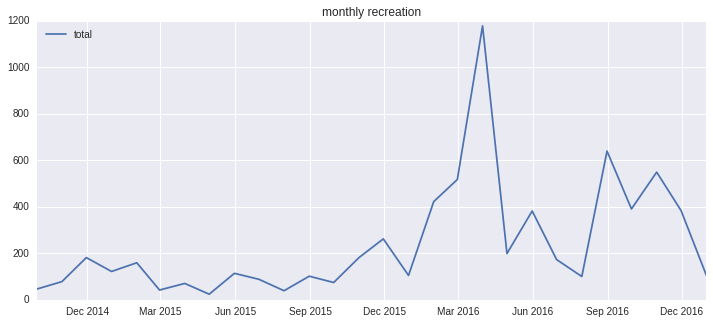

In [41]:
plt.figure(figsize=(12,5))
# subind = (gr_by_mn['person']=='c') & (gr_by_mn['category']==5)
# plt.plot(gr_by_mn.loc[subind,'date'],gr_by_mn.loc[subind,'amount'],label="Claire")
# subind = (gr_by_mn['person']=='w') & (gr_by_mn['category']==5)
subind = (gr_by_mn['category']==5)
plt.plot(gr_by_mn.loc[subind,'date'],gr_by_mn.loc[subind,'amount'],label="total")
plt.title('monthly recreation')
plt.legend(loc=2)

In [103]:
gr_shared = df.loc[df['category']>0].groupby([pd.TimeGrouper('M')]).sum().reset_index()

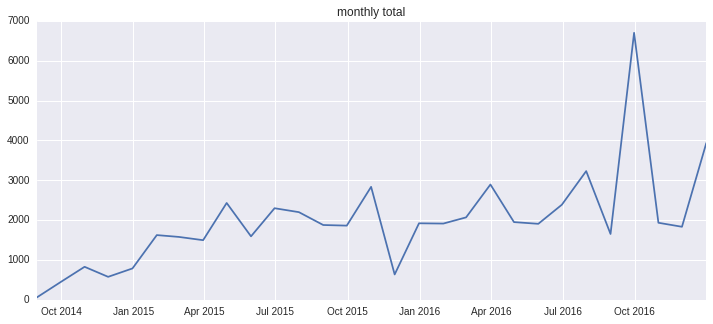

In [104]:
plt.figure(figsize=(12,5))
# subind = (gr_shared['person']=='c') 
# plt.plot(gr_shared.loc[subind,'date'],gr_shared.loc[subind,'amount'])
# subind = (gr_shared['person']=='w')
plt.plot(gr_shared.loc[:,'date'],gr_shared.loc[:,'amount'])
plt.title('monthly total')

In [82]:
gr_tot = df.loc[df['category']>0].groupby(pd.TimeGrouper('M')).sum().reset_index()

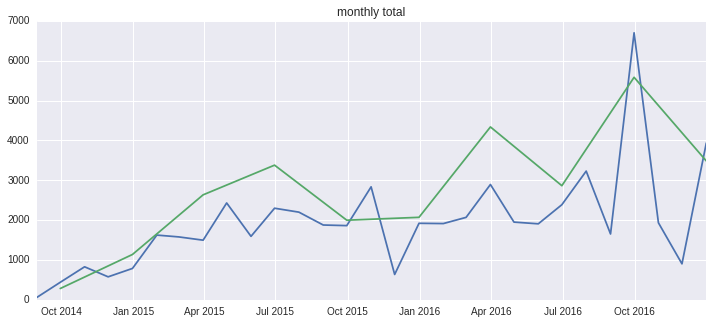

In [83]:
plt.figure(figsize=(12,5))
plt.plot(gr_tot['date'],gr_tot['amount'])
subind = (gr_shared['person']=='c')
plt.plot(gr_shared.loc[subind,'date'],gr_shared.loc[subind,'amount'])
plt.title('monthly total')

In [98]:
gr_inc = df.loc[df['category']==0].groupby([pd.TimeGrouper('M'),'person']).sum().reset_index()

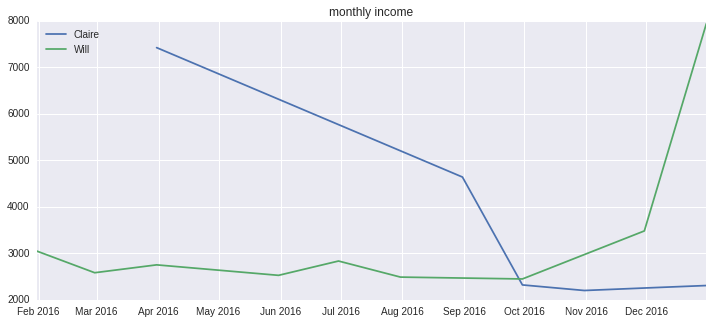

In [99]:
plt.figure(figsize=(12,5))
subind = (gr_inc['person']=='c')
plt.plot(gr_inc.loc[subind,'date'],-gr_inc.loc[subind,'amount'],label="Claire")
subind = (gr_inc['person']=='w')
plt.plot(gr_inc.loc[subind,'date'],-gr_inc.loc[subind,'amount'],label="Will")
plt.title('monthly income')
plt.legend(loc=2)

In [77]:
df.loc[(df.index>'7/1/2016') & (df.index<'9/30/2016') & (df['category']>0) & (abs(df['amount'])>=900),:]

,notes,amount,category,person
date,,,,
2016-07-07,rent,1000.0,1.0,w
2016-09-15,rent to pete,2000.0,1.0,w
2016-09-21,sec deposit,930.0,1.0,w
2016-07-29,rent,1000.0,1.0,c
2016-09-21,rent,930.0,1.0,c


In [92]:
df.loc[ (abs(df['amount'])>=900),:]

,notes,amount,category,person
date,,,,
2015-04-03,uae trip,947.50,3.0,c
2015-01-01,rent,980.00,3.0,c
2015-03-01,rent,980.00,3.0,c
2015-05-01,rent,980.00,3.0,c
2015-10-30,rent,1000.00,3.0,c
2015-02-01,rent,980.00,3.0,w
2015-04-01,rent,980.00,3.0,w
2015-06-01,rent,980.00,3.0,w
2015-07-01,rent,980.00,3.0,w
